<a href="https://colab.research.google.com/github/kittimaxz/Project_BoneAge/blob/main/CropImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
!pip install pydicom
import pydicom
import matplotlib.pyplot as plt
from skimage.transform import resize
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่าMounted at /content/drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์

In [4]:
path = '/content/drive/My Drive/Project_Boneage'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

In [7]:
img_file  = os.path.join(path,'pydicom/1377.dcm')
img = pydicom.dcmread(img_file)

In [8]:
# Resize the pixels
w = int(img.pixel_array.shape[0] * .25)
h = int(img.pixel_array.shape[1] * .25)

In [11]:
px = img.pixel_array / 255
img = resize(px, (w, h), anti_aliasing=True).astype(float)

In [12]:
# scale the pixels
img = (np.maximum(img,0) / img.max()) * 255.0
img = np.uint8(img)

# TODO: Invert MONOCHROME1 images here.

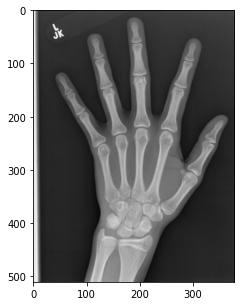

In [13]:
# Display the original image
plt.figure(figsize=(15,5))
plt.imshow(img,cmap="gray");

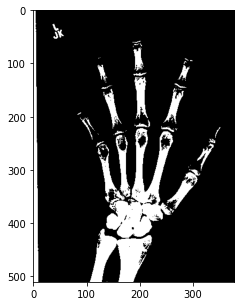

In [14]:
# Make a binarized copy of the image
thresh = 150
img_bin = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(15,5))
plt.imshow(img_bin,cmap="gray");

In [15]:
# Flip the image 90 degrees
img_bin = cv2.rotate(img_bin, cv2.cv2.ROTATE_90_CLOCKWISE)
plt.figure(figsize=(15,5))
plt.imshow(img_bin,cmap="gray");

AttributeError: ignored